In [90]:
'''
PI : Ciencia de Datos con Python
Módulo : Análisis de datos con Python
Sesión : Semana 2 - Análisis Descriptivo de Datos
Fecha : Diciembre 2025
'''

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns   
from scipy import stats

### 1.- Cargando los datos, mostrando tipos de datos y eliminando valores nulos

In [91]:
df = pd.read_csv("dataset/autos_sin_nan.csv")
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


In [92]:
df.dtypes

symboling              int64
normalized-losses      int64
make                  object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
city-L/100km         float64
horsepower-binned     object
diesel                 int64
gas                    int64
dtype: object

In [93]:
df.isnull().sum()

symboling            0
normalized-losses    0
make                 0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               4
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
city-L/100km         0
horsepower-binned    1
diesel               0
gas                  0
dtype: int64

In [94]:
df.dropna(axis=0, inplace=True)

In [95]:
df.isnull().sum()

symboling            0
normalized-losses    0
make                 0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
city-L/100km         0
horsepower-binned    0
diesel               0
gas                  0
dtype: int64

### 2.- Seleccionando variables y realizando gráficos de estas

In [96]:
var_numericas = df.select_dtypes(include=['int64', 'float64']).columns
var_numericas

Index(['symboling', 'normalized-losses', 'wheel-base', 'length', 'width',
       'height', 'curb-weight', 'engine-size', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price', 'city-L/100km', 'diesel', 'gas'],
      dtype='object')

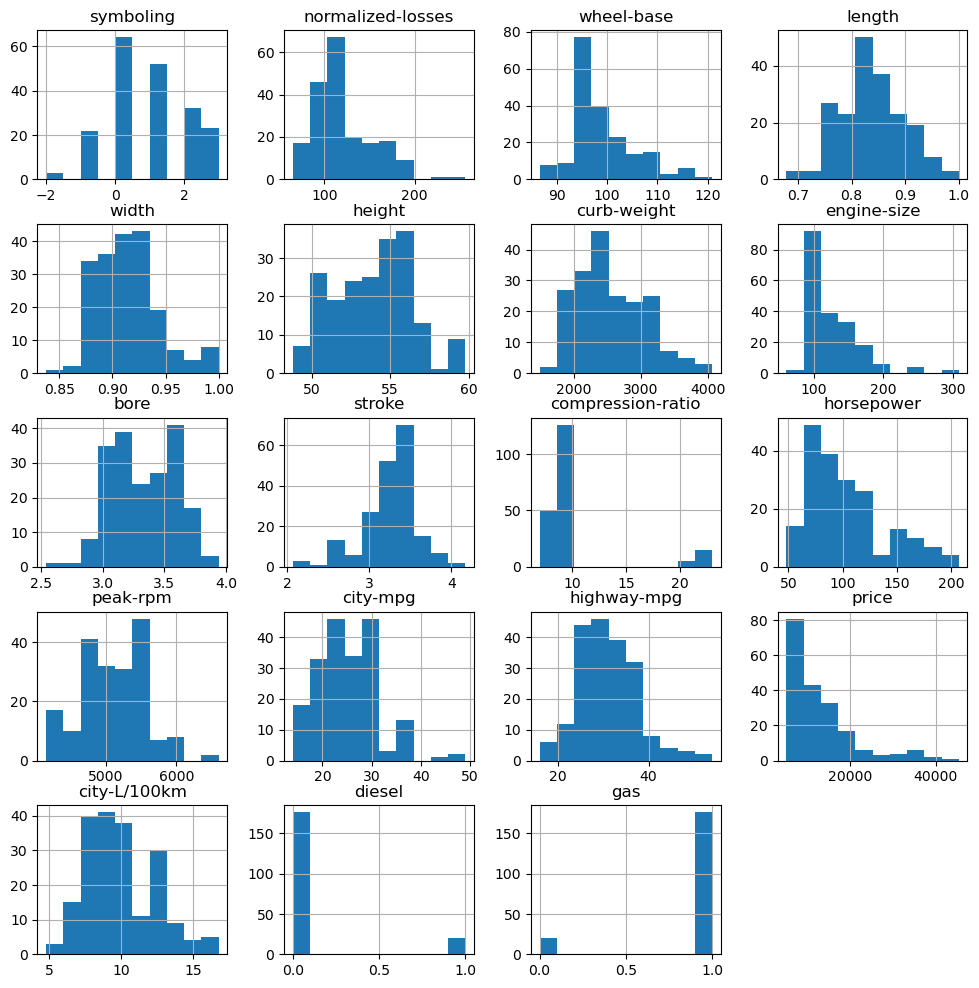

In [97]:
df[var_numericas].hist(layout=(5,4), sharex=False, sharey=False, figsize=(12,12))
plt.show()

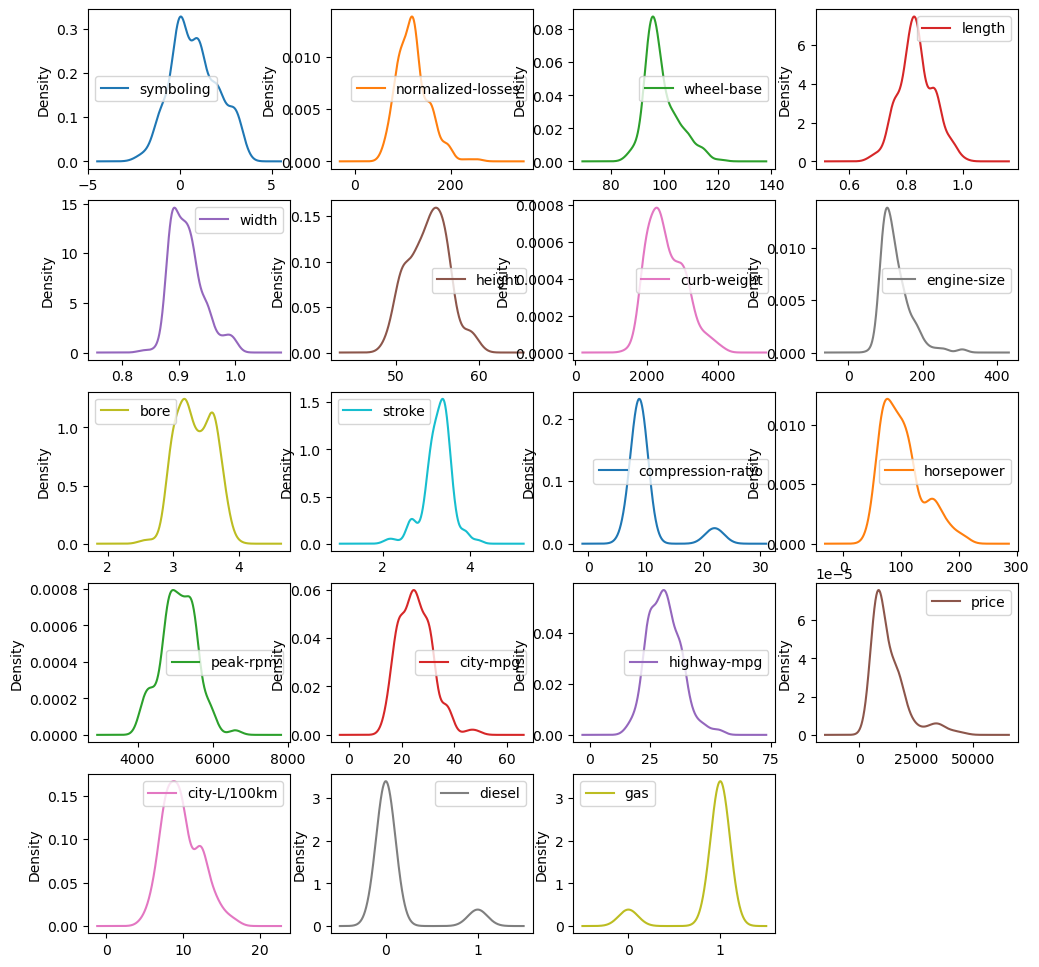

In [98]:
df[var_numericas].plot(kind='density', subplots=True, layout=(5,4), sharex=False, sharey=False, figsize=(12,12))
plt.show()

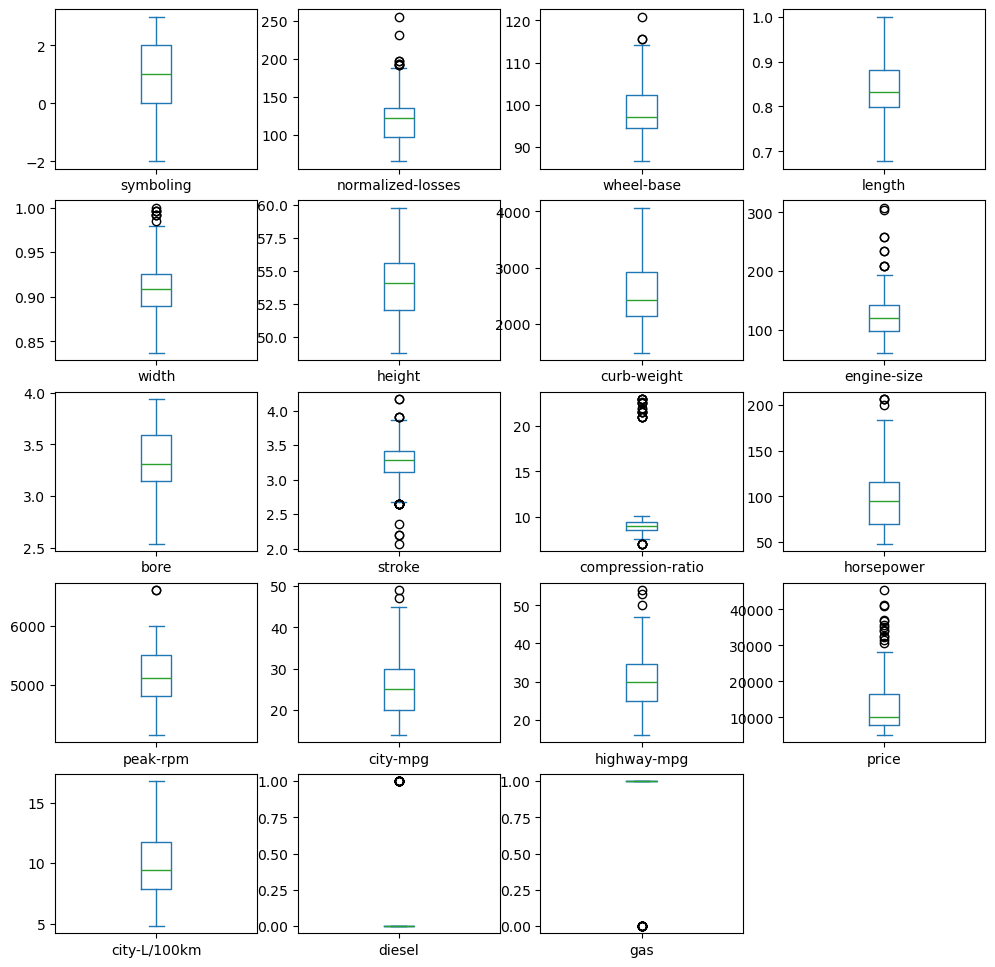

In [99]:
df[var_numericas].plot(kind='box', subplots=True, layout=(5,4), sharex=False, sharey=False, figsize=(12,12))
plt.show()

### 3.- Graficando diagramas de dispersión

/opt/anaconda3/lib/python3.13/site-packages/pandas/plotting/_matplotlib/misc.py:96: UserWarning: You passed a edgecolor/edgecolors ('none') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(


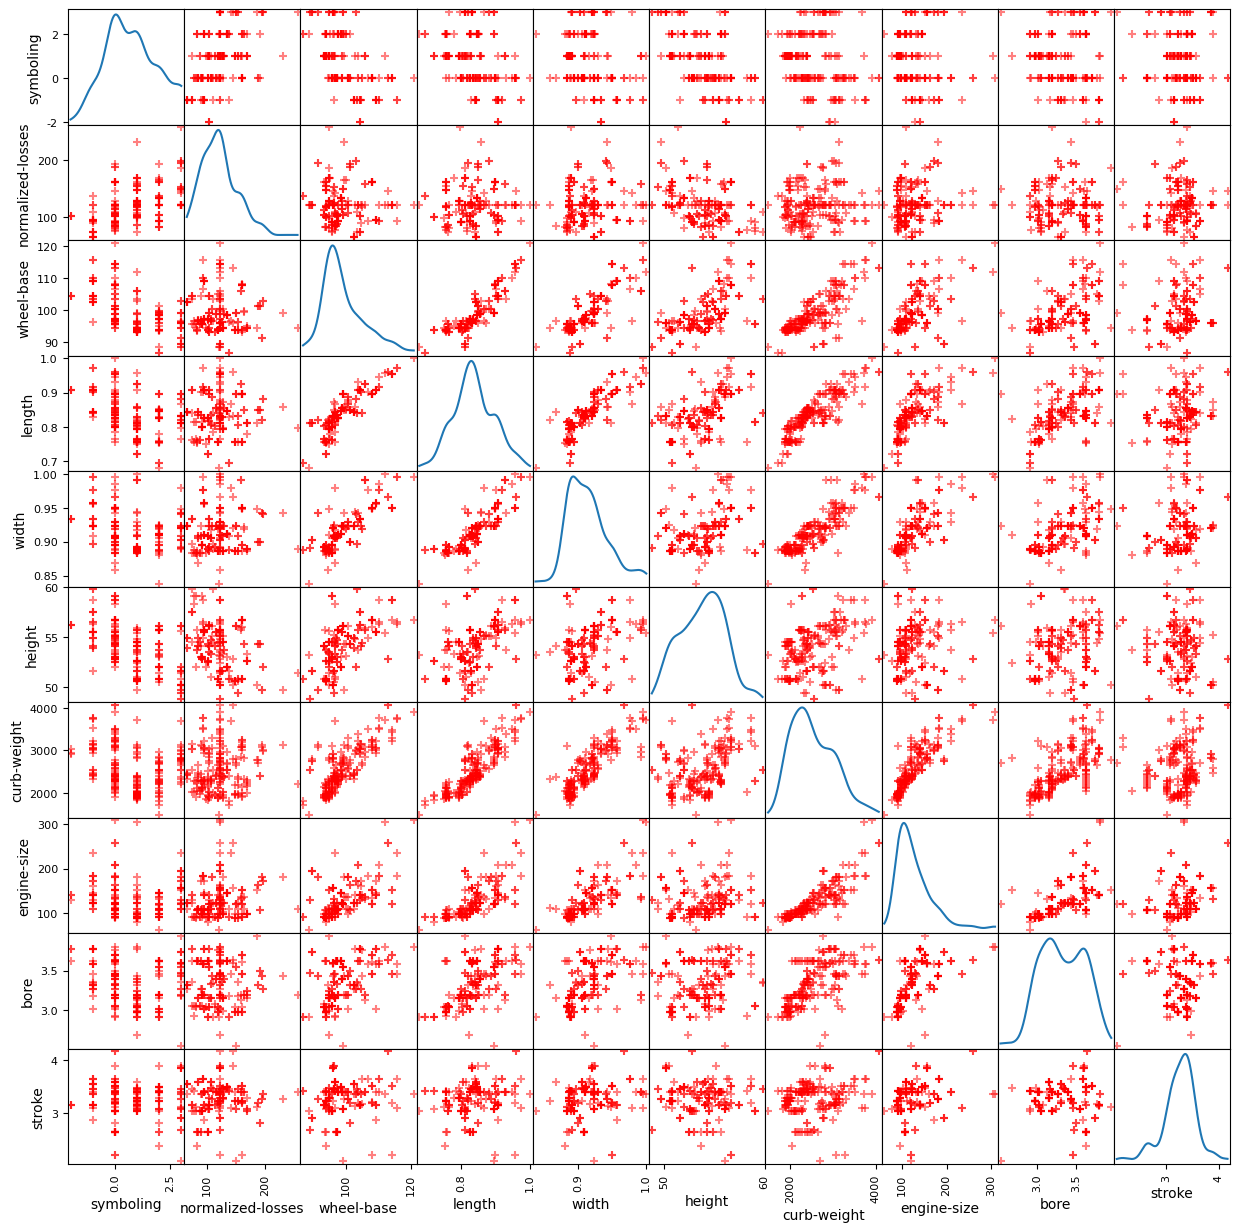

In [100]:
from pandas.plotting import scatter_matrix

scatter_matrix(df[var_numericas].iloc[:,0:10], figsize=(15,15), color='red',
               diagonal='kde', marker="+")
plt.show()

/opt/anaconda3/lib/python3.13/site-packages/pandas/plotting/_matplotlib/misc.py:96: UserWarning: You passed a edgecolor/edgecolors ('none') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(


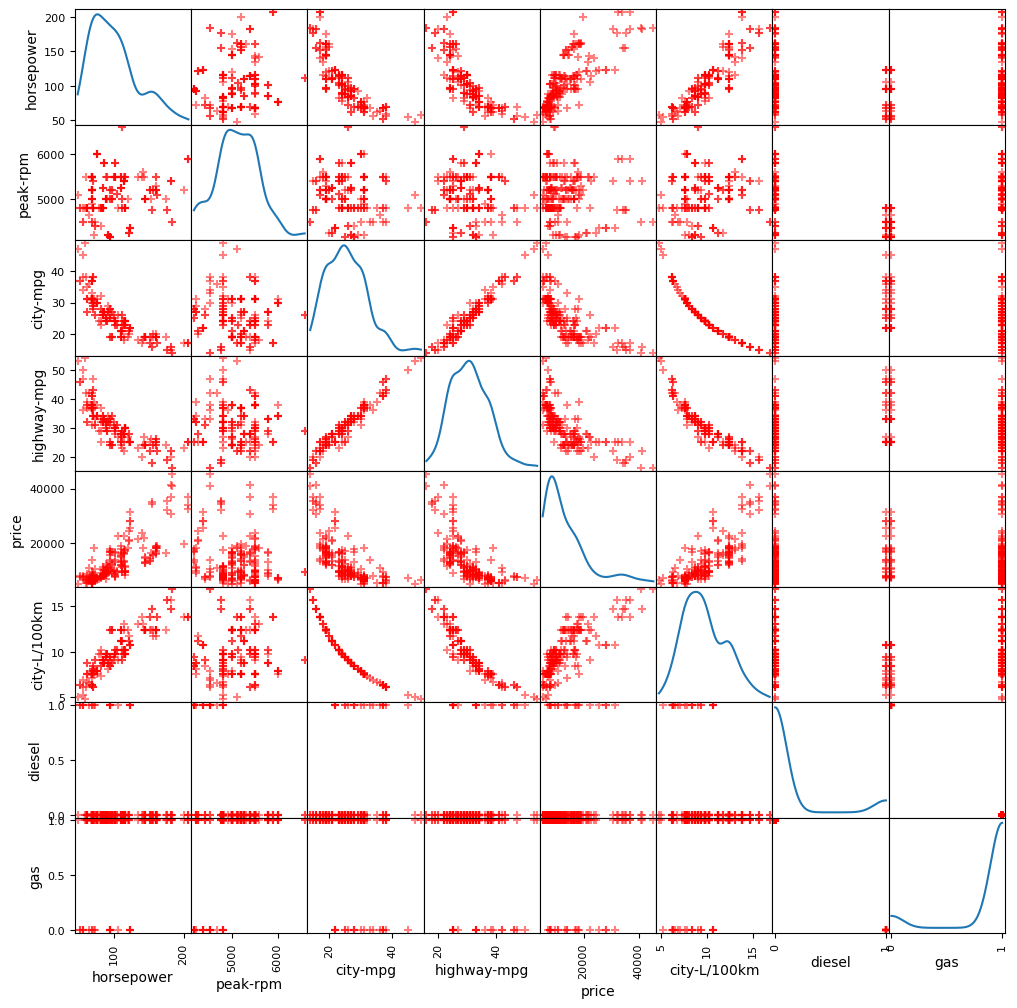

In [101]:
scatter_matrix(df[var_numericas].iloc[:,11:len(var_numericas)], figsize=(12,12), color='red',
               diagonal='kde', marker="+")
plt.show()

### 4.- Graficando matriz de correlación y mapa de calor

In [102]:
df[var_numericas].corr()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
symboling,1.000000,0.453423,-0.533112,-0.359883,-0.242821,-0.539407,-0.226121,-0.055329,-0.142125,-0.013520,-0.180275,0.090778,0.229436,0.004688,0.073359,-0.076420,0.021612,-0.192544,0.192544
normalized-losses,0.453423,1.000000,-0.046971,0.027234,0.090056,-0.362499,0.107034,0.147862,-0.030152,0.056054,-0.112288,0.226654,0.215903,-0.208695,-0.166772,0.138183,0.223308,-0.096487,0.096487
wheel-base,-0.533112,-0.046971,1.000000,0.876945,0.821427,0.607417,0.790205,0.592517,0.493941,0.163725,0.248383,0.381984,-0.351925,-0.496565,-0.566948,0.591956,0.517050,0.305889,-0.305889
length,-0.359883,0.027234,0.876945,1.000000,0.857249,0.522367,0.882091,0.698626,0.608496,0.136850,0.156926,0.583073,-0.280397,-0.686142,-0.715124,0.689466,0.690579,0.212484,-0.212484
width,-0.242821,0.090056,0.821427,0.857249,1.000000,0.351127,0.862835,0.739543,0.543859,0.210495,0.188331,0.604099,-0.252116,-0.639692,-0.684550,0.744176,0.685663,0.251112,-0.251112
height,-0.539407,-0.362499,0.607417,0.522367,0.351127,1.000000,0.354085,0.100518,0.199490,-0.084755,0.269773,-0.031489,-0.270020,-0.128523,-0.181670,0.182407,0.111120,0.279063,-0.279063
curb-weight,-0.226121,0.107034,0.790205,0.882091,0.862835,0.354085,1.000000,0.858968,0.646918,0.193575,0.153952,0.750749,-0.281231,-0.766146,-0.808146,0.828483,0.809512,0.228445,-0.228445
engine-size,-0.055329,0.147862,0.592517,0.698626,0.739543,0.100518,0.858968,1.000000,0.601384,0.265626,0.017246,0.825377,-0.227577,-0.712693,-0.734062,0.889265,0.814696,0.076032,-0.076032
bore,-0.142125,-0.030152,0.493941,0.608496,0.543859,0.199490,0.646918,0.601384,1.000000,-0.049606,-0.000044,0.579114,-0.276668,-0.591597,-0.598455,0.544375,0.574286,0.055927,-0.055927
stroke,-0.013520,0.056054,0.163725,0.136850,0.210495,-0.084755,0.193575,0.265626,-0.049606,1.000000,0.191776,0.139409,-0.067852,-0.050971,-0.052345,0.107893,0.065893,0.240193,-0.240193


In [103]:
custom_var = ['bore','stroke','compression-ratio','horsepower']
df[custom_var].corr()

,bore,stroke,compression-ratio,horsepower
bore,1.000000,-0.049606,-0.000044,0.579114
stroke,-0.049606,1.000000,0.191776,0.139409
compression-ratio,-0.000044,0.191776,1.000000,-0.232284
horsepower,0.579114,0.139409,-0.232284,1.000000


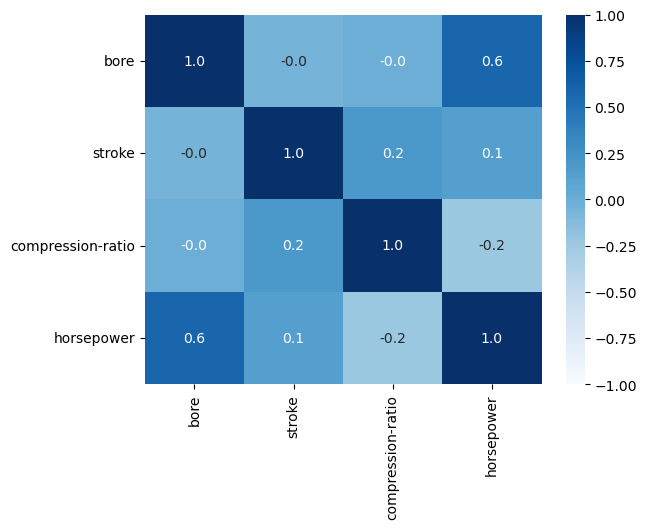

In [104]:
sns.heatmap(df[custom_var].corr(), vmin=-1,vmax=1, annot=True, fmt='.1f', cmap='Blues')
plt.show()

### 5.- Función para graficar mapa de calor

In [105]:
def heatmap_corr(lista):
    corr = df[lista].corr(method='pearson')
    corr1 = corr.to_numpy()
    fig, ax = plt.subplots(figsize=(8,8))
    cax = ax.imshow(corr1, cmap='coolwarm', vmin=-1, vmax=1)
    ax.set_xticks(np.arange(len(lista)))
    ax.set_yticks(np.arange(len(lista)))
    ax.set_xticklabels(lista, rotation=45, ha='right')
    ax.set_yticklabels(lista)
    for i in range(len(lista)):
        for j in range(len(lista)):
            text = ax.text(j, i, f"{corr1[i, j]:.2f}",
                           ha="center", va="center", color="w" if abs(corr1[i, j]) > 0.5 else "black")
    fig.colorbar(cax)
    plt.title("Heatmap de Correlación")
    plt.show()

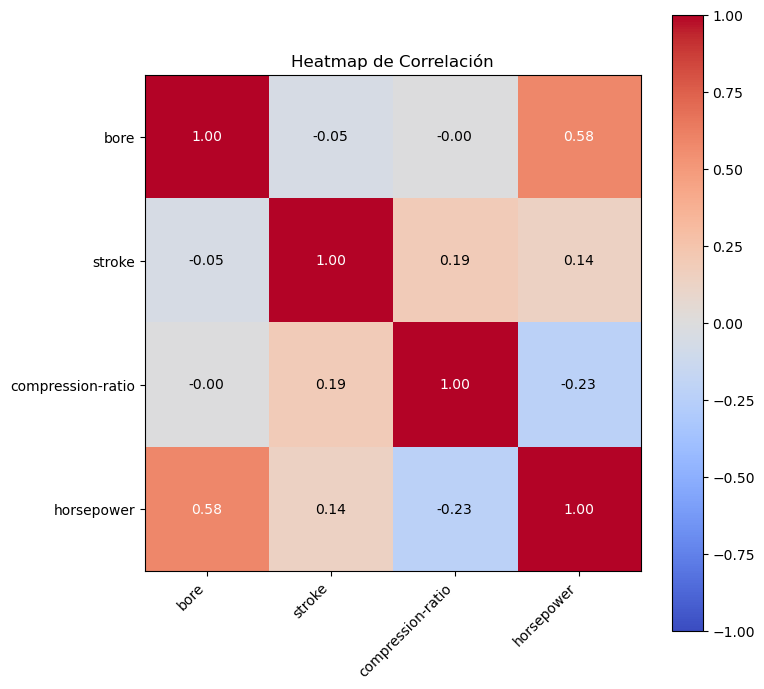

In [106]:
heatmap_corr(custom_var)

### 7.- Relaciones lineales entre variables

<Axes: xlabel='engine-size', ylabel='price'>

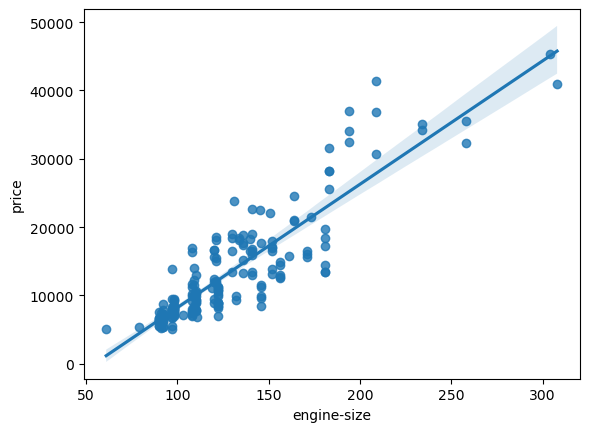

In [107]:
sns.regplot(x='engine-size', y='price', data=df)

In [108]:
df[['engine-size', 'price']].corr()

,engine-size,price
engine-size,1.000000,0.889265
price,0.889265,1.000000


### 8.- Analizando la relación entre variables categóricas y la variable dependiente

<Axes: xlabel='body-style', ylabel='price'>

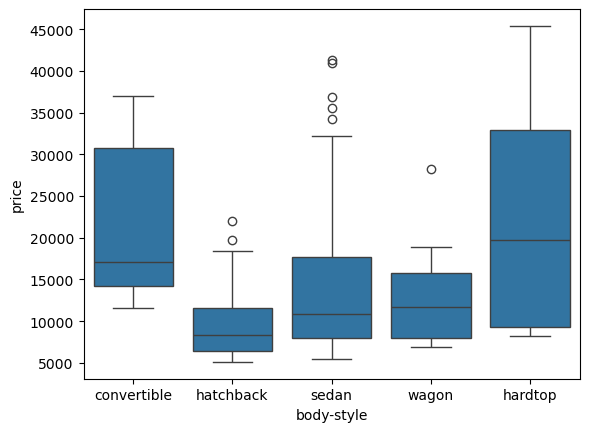

In [109]:
sns.boxplot(x='body-style', y='price', data=df)

<Axes: xlabel='engine-location', ylabel='price'>

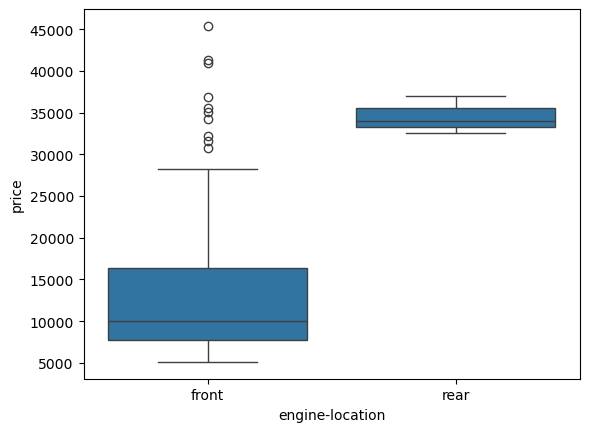

In [110]:
sns.boxplot(x='engine-location', y='price', data=df)

<Axes: xlabel='drive-wheels', ylabel='price'>

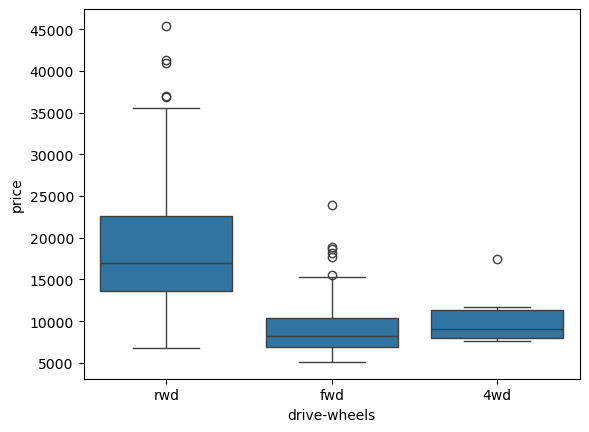

In [111]:
sns.boxplot(x='drive-wheels', y='price', data=df)

<Axes: xlabel='num-of-cylinders', ylabel='price'>

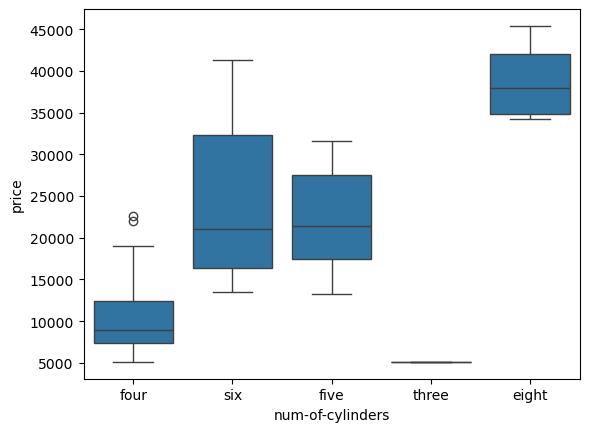

In [112]:
sns.boxplot(x='num-of-cylinders', y='price', data=df)

<Axes: xlabel='fuel-system', ylabel='price'>

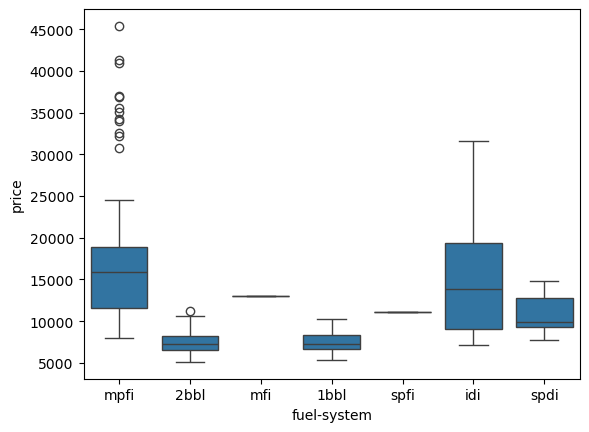

In [113]:
sns.boxplot(x='fuel-system', y='price', data=df)

### 10.- Conteo de frecuencias en variables categóricas

In [114]:
drive_wheels_counts = df['drive-wheels'].value_counts().to_frame()
# drive_wheels_counts.rename(columns={'drive-wheels':'value_counts'}, inplace=True)
# drive_wheels_counts.index.name = 'drive-wheels'
drive_wheels_counts.head() 

,count
drive-wheels,
fwd,118
rwd,70
4wd,8


In [115]:
drive_wheels_counts = df['engine-location'].value_counts().to_frame()
# drive_wheels_counts.rename(columns={'engine-location':'value_counts'}, inplace=True)
# drive_wheels_counts.index.name = 'engine-location'
drive_wheels_counts.head() 

,count
engine-location,
front,193
rear,3


### 11.- Agrupamiento de columnas

In [116]:
df_group = df[['drive-wheels','price']]
df_group.head()

,drive-wheels,price
0,rwd,13495.0
1,rwd,16500.0
2,rwd,16500.0
3,fwd,13950.0
4,4wd,17450.0


In [118]:
df_group_one = df_group.groupby(['drive-wheels'], as_index=False).mean()
df_group_one.head()
# df_grouped.rename(columns={'price':'mean_price'}, inplace=True)
# df_pivot = df_grouped.pivot(index='drive-wheels', columns='body-style

,drive-wheels,price
0,4wd,10241.000000
1,fwd,9244.779661
2,rwd,19910.585714


In [120]:
df_group = df[['drive-wheels','body-style','price']]
df_group.head()


,drive-wheels,body-style,price
0,rwd,convertible,13495.0
1,rwd,convertible,16500.0
2,rwd,hatchback,16500.0
3,fwd,sedan,13950.0
4,4wd,sedan,17450.0


In [121]:
df_group_two = df_group.groupby(['drive-wheels','body-style'], as_index=False).mean()
df_group_two.head()

,drive-wheels,body-style,price
0,4wd,hatchback,7603.000000
1,4wd,sedan,12647.333333
2,4wd,wagon,9095.750000
3,fwd,convertible,11595.000000
4,fwd,hardtop,8249.000000
